In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import os
import sys
import glob
import warnings
warnings.filterwarnings("ignore")

In [4]:
hd=pd.read_excel(r"E:\ds course\data sets\prac data sets\AirPassengers.xlsx")

In [5]:
hd.head()

,Week_num,Passengers,Promotion_Budget,Service_Quality_Score,Holiday_week,Delayed_Cancelled_flight_ind,Inter_metro_flight_ratio,Bad_Weather_Ind,Technical_issues_ind
0,1,37824,517356,4.00000,NO,NO,0.70,YES,YES
1,2,43936,646086,2.67466,NO,YES,0.80,YES,YES
2,3,42896,638330,3.29473,NO,NO,0.90,NO,NO
3,4,35792,506492,3.85684,NO,NO,0.40,NO,NO
4,5,38624,609658,3.90757,NO,NO,0.87,NO,YES


In [6]:
hd1=hd[["Passengers","Promotion_Budget"]]

In [7]:
hd1.head()

,Passengers,Promotion_Budget
0,37824,517356
1,43936,646086
2,42896,638330
3,35792,506492
4,38624,609658


# objective:
 #     * by using the independent variable , we are trying to predict the dependent variable
# * hence by using promotional_budget we are trying to predict the passengers

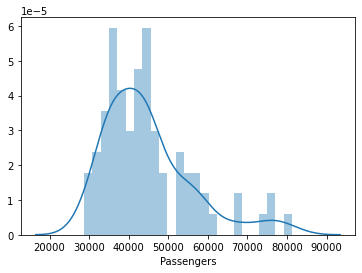

In [9]:
sbn.distplot(hd1["Passengers"],bins=25)

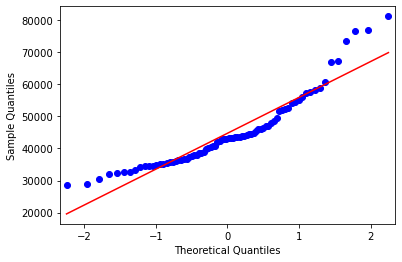

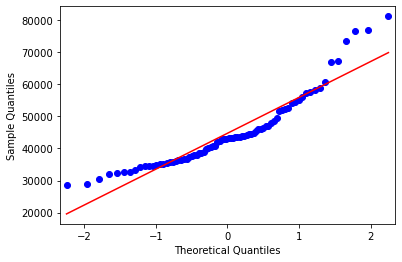

In [11]:
from statsmodels.graphics.gofplots import qqplot
qqplot(hd1["Passengers"],line="s")

Text(0, 0.5, 'passengers')

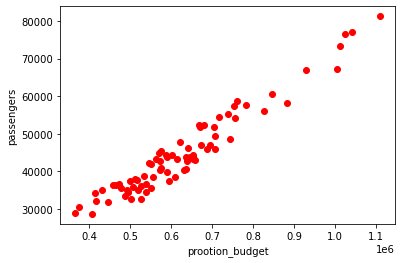

In [14]:
plt.scatter(hd1["Promotion_Budget"],hd1["Passengers"],color="r")
plt.xlabel("prootion_budget")
plt.ylabel("passengers")

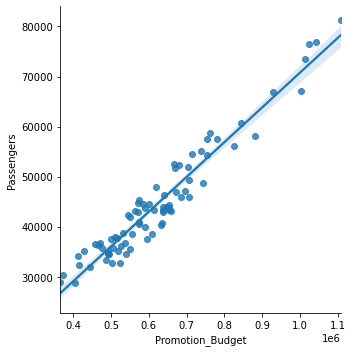

In [15]:
sbn.lmplot(x="Promotion_Budget",y="Passengers",data=hd1)

In [19]:
def coeff_cal(x,y):
    b1=sum((x-np.mean(x))*(y-np.mean(y)))/sum((x-np.mean(x))**2)
    b0=np.mean(y)-(b1*np.mean(x))
    return b0,b1

In [25]:
coefs=coeff_cal(x=hd1["Promotion_Budget"],y=hd1["Passengers"])
coefs

(1259.6058320095326, 0.0695296852886541)

In [28]:
hd1["pred"]=coefs[0]+coefs[1]*hd1["Promotion_Budget"]

In [29]:
hd1.head()

,Passengers,Promotion_Budget,pred
0,37824,517356,37231.205694
1,43936,646086,46181.762081
2,42896,638330,45642.489842
3,35792,506492,36475.835193
4,38624,609658,43648.934706


Text(0, 0.5, 'Passenegrs')

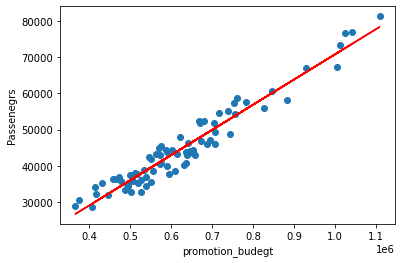

In [31]:
plt.scatter(hd1["Promotion_Budget"],hd1["Passengers"])
plt.plot(hd1["Promotion_Budget"],hd1["pred"],"r")
plt.xlabel("promotion_budegt")
plt.ylabel("Passenegrs")

In [32]:
hd1.head()

,Passengers,Promotion_Budget,pred
0,37824,517356,37231.205694
1,43936,646086,46181.762081
2,42896,638330,45642.489842
3,35792,506492,36475.835193
4,38624,609658,43648.934706


In [33]:
hd1["error"]=hd1["Passengers"]-hd1["pred"]

In [34]:
hd1.head()

,Passengers,Promotion_Budget,pred,error
0,37824,517356,37231.205694,592.794306
1,43936,646086,46181.762081,-2245.762081
2,42896,638330,45642.489842,-2746.489842
3,35792,506492,36475.835193,-683.835193
4,38624,609658,43648.934706,-5024.934706


In [35]:
round(sum(hd1["error"]),1)

-0.0

In [36]:
round(sum(hd1["error"]),6)

-0.0

In [37]:
hd1["err_sqr"]=hd1["error"]**2

In [38]:
hd1.head()

,Passengers,Promotion_Budget,pred,error,err_sqr
0,37824,517356,37231.205694,592.794306,3.514051e+05
1,43936,646086,46181.762081,-2245.762081,5.043447e+06
2,42896,638330,45642.489842,-2746.489842,7.543206e+06
3,35792,506492,36475.835193,-683.835193,4.676306e+05
4,38624,609658,43648.934706,-5024.934706,2.524997e+07


In [39]:
pd.options.display.float_format="{:.2f}".format
hd1.head()

,Passengers,Promotion_Budget,pred,error,err_sqr
0,37824,517356,37231.21,592.79,351405.09
1,43936,646086,46181.76,-2245.76,5043447.33
2,42896,638330,45642.49,-2746.49,7543206.45
3,35792,506492,36475.84,-683.84,467630.57
4,38624,609658,43648.93,-5024.93,25249968.80


In [41]:
sse=sum(hd1["err_sqr"]) # with the help of ols we got this output
sse

673261653.1185532

In [46]:
sst=sum((hd1["Passengers"]-hd1["Passengers"].mean())**2)

In [47]:
sst

10028954143.949999

In [48]:
r2_val=1-sse/sst

In [49]:
r2_val

0.9328682090420465

# conclusion:
  * 93.2% of variance of dependent variable is explaining the variace of predictors
  
  * 93.2% of variance of passengers are explaining the variance of promotion_budget

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(hd1[["Promotion_Budget"]],hd1[["Passengers"]])
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [52]:
lr.coef_

array([[0.06952969]])

In [53]:
lr.n_features_in_

1

In [54]:
lr.intercept_

array([1259.60583201])

In [55]:
lr.score(hd1[["Promotion_Budget"]],hd1[["Passengers"]])

0.9328682090420465

In [56]:
lr.singular_

array([1391129.96582713])

In [57]:
lr.set_params

<bound method BaseEstimator.set_params of LinearRegression()>